In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# import pycharts
import pymysql
import numpy as np

In [4]:
conn = pymysql.connect(	
    host = 'localhost',	
    user = 'root',	
    passwd = '123456',	
    db = 'scrapy_django',	
    port=3306,	
    charset = 'utf8'	
)
df = pd.read_sql('select *  from HourWeather where weather_id = (select id from DateWeather where city_id=1 and date=curdate() ) and belong_to_date=curdate();',conn)
df.head()

,id,hour,temperature,wind_power,wind_direction,precipitation,relative_humidity,AQI,Weather_id,belong_to_date
0,384667,10,13.0,2.0,东北风,0.0,29,0,90673,2021-04-10
1,384668,9,12.0,2.0,东北风,0.0,30,75,90673,2021-04-10
2,384669,8,11.0,3.0,北风,0.0,32,73,90673,2021-04-10
3,384670,7,10.0,1.0,东风,0.0,33,72,90673,2021-04-10
4,384671,6,9.0,1.0,东北风,0.0,39,69,90673,2021-04-10


[1.7777777777777777, 2.3333333333333335, 3.0, 0, 0, 0, 0, 2.142857142857143]


/Users/zhengyiming/opt/anaconda3/envs/xkool_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhengyiming/opt/anaconda3/envs/xkool_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhengyiming/opt/anaconda3/envs/xkool_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39118 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhengyiming/opt/anaconda3/envs/xkool_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhengyiming/opt/anaconda3/envs/xkool_work/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22270 missing from curren

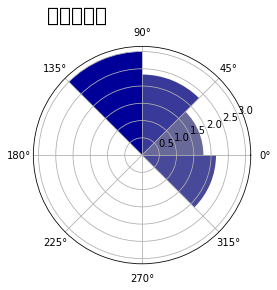

In [8]:
wind = list(df['wind_direction'])
wind_speed = list(df['wind_power'])
for i in range(0,24):
    if wind[i] == "北风":
        wind[i] = 90
    elif wind[i] == "南风":
        wind[i] = 270
    elif wind[i] == "西风":
        wind[i] = 180
    elif wind[i] == "东风":
        wind[i] = 360
    elif wind[i] == "东北风":
        wind[i] = 45
    elif wind[i] == "西北风":
        wind[i] = 135
    elif wind[i] == "西南风":
        wind[i] = 225
    elif wind[i] == "东南风":
        wind[i] = 315
degs = np.arange(45,361,45)
temp = []
for deg in degs:
    speed = []
    # 获取 wind_deg 在指定范围的风速平均值数据
    for i in range(0,24):
        if wind[i] == deg:
            speed.append(wind_speed[i])
    if len(speed) == 0:
        temp.append(0)
    else:
        temp.append(sum(speed)/len(speed))
print(temp)
N = 8
theta = np.arange(0.+np.pi/8,2*np.pi+np.pi/8,2*np.pi/8)
# 数据极径
radii = np.array(temp)
# 绘制极区图坐标系
plt.axes(polar=True)
# 定义每个扇区的RGB值（R,G,B），x越大，对应的颜色越接近蓝色
colors = [(1-x/max(temp), 1-x/max(temp),0.6) for x in radii]
plt.bar(theta,radii,width=(2*np.pi/N),bottom=0.0,color=colors)
plt.title('一天风级图',x=0.2,fontsize=20)
plt.show()